<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/%5BAnswer%5D_Exercise_Week_4_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [9]:
# Mengimpor library Pandas untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk melakukan komputasi numerik dan operasi pada array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi grafis seperti grafik, plot, dan diagram.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data statistik yang lebih estetis dan mudah digunakan.
import seaborn as sns
# Mengimpor LabelEncoder dari scikit-learn untuk mengubah data kategorikal menjadi representasi numerik.
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split
# Mengimpor DecisionTreeClassifier dari scikit-learn untuk membuat model klasifikasi berbasis Decision Tree.
from sklearn.tree import DecisionTreeClassifier
# Mengimpor metrik evaluasi seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur kinerja model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor modul tree dari scikit-learn untuk bekerja dengan model decision tree, termasuk visualisasi Tree.
from sklearn import tree
# Mengimpor Gaussian Naive Bayes dari scikit-learn untuk membangun model klasifikasi berbasis Naive Bayes dengan distribusi Gaussian.
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [10]:
#1
# Mengambil dataset penguins dari URL menggunakan Pandas dan membacanya sebagai DataFrame dengan pemisah koma (',').
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-W4-Data-Mining/refs/heads/main/penguins_size.csv"
df = pd.read_csv(url, delimiter=',')
# Menampilkan 10 sampel acak dari DataFrame untuk mendapatkan gambaran umum tentang data.
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
48,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
45,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE
46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
69,Adelie,Torgersen,41.8,19.4,198.0,4450.0,MALE
135,Adelie,Dream,41.1,17.5,190.0,3900.0,MALE
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [11]:
#2
# Menampilkan informasi ringkas tentang DataFrame, termasuk jumlah entri,
# jumlah non-null, tipe data tiap kolom, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [12]:
#3
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame,
# termasuk jumlah, rata-rata, standar deviasi, nilai minimum, dan persentil.
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**4**. display the number of each unique value in species, island, and sex columns (including NaN)

In [13]:
#4
# Menghitung jumlah kemunculan setiap spesies dalam kolom 'species', termasuk nilai NaN (jika ada).
species_counts = df['species'].value_counts(dropna=False)
# Menghitung jumlah kemunculan setiap pulau dalam kolom 'island', termasuk nilai NaN (jika ada).
island_counts = df['island'].value_counts(dropna=False)
# Menghitung jumlah kemunculan setiap jenis kelamin dalam kolom 'sex', termasuk nilai NaN (jika ada).
sex_counts = df['sex'].value_counts(dropna=False)

# Mengembalikan hasil penghitungan untuk spesies, pulau, dan jenis kelamin.
species_counts, island_counts, sex_counts

(species
 Adelie       152
 Gentoo       124
 Chinstrap     68
 Name: count, dtype: int64,
 island
 Biscoe       168
 Dream        124
 Torgersen     52
 Name: count, dtype: int64,
 sex
 MALE      168
 FEMALE    165
 NaN        10
 .           1
 Name: count, dtype: int64)

5. Null handling

In [14]:
#5
# Replace invalid entries (like '.') in the 'sex' column with NaN
df['sex'] = df['sex'].replace('.', pd.NA)

# Impute missing 'sex' values based on mode (most frequent value)
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

# Impute missing numeric values (mean imputation for simplicity)
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

# Check for any remaining missing values
df_cleaned = df.isnull().sum()

# Display the result
df_cleaned


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

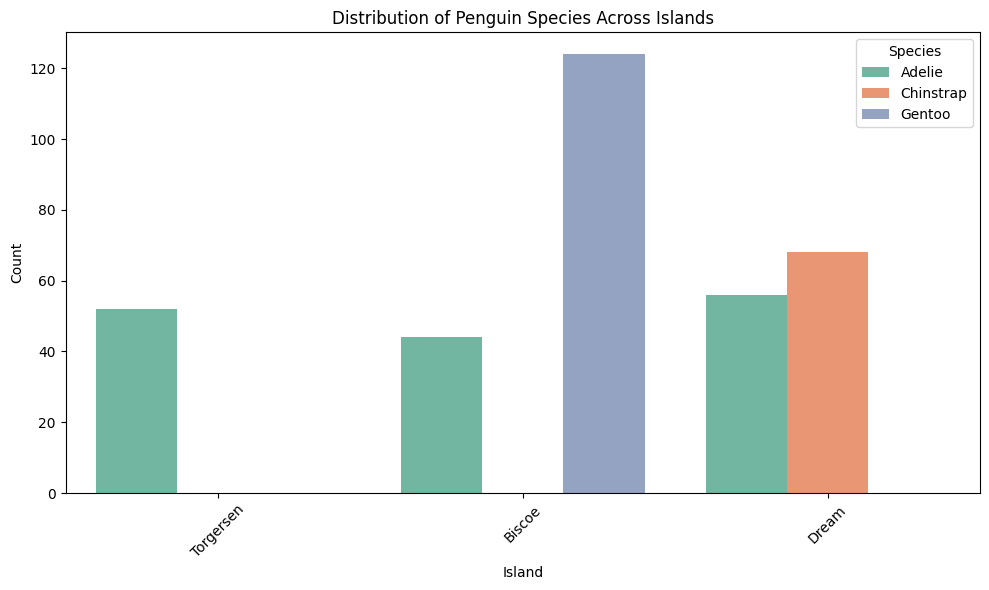

In [15]:
#6
# Visualize the distribution of penguin species across different islands.

# Mengatur ukuran figure untuk visualisasi grafik.
plt.figure(figsize=(10, 6))
# Membuat countplot untuk menampilkan distribusi spesies penguin berdasarkan pulau, dengan warna berbeda untuk setiap spesies menggunakan palet 'Set2'.
sns.countplot(data=df, x='island', hue='species', palette='Set2')
# Menambahkan judul pada grafik.
plt.title('Distribution of Penguin Species Across Islands')
# Menambahkan label untuk sumbu X.
plt.xlabel('Island')
# Menambahkan label untuk sumbu Y.
plt.ylabel('Count')
# Menambahkan legenda dengan judul 'Species'.
plt.legend(title='Species')

# Memutar label sumbu X sebesar 45 derajat agar lebih mudah dibaca.
plt.xticks(rotation=45)
# Mengoptimalkan tata letak grafik.
plt.tight_layout()
# Menampilkan grafik.
plt.show()

# This visualization shows the distribution of different penguin species across the three islands: Biscoe, Dream, and Torgersen.
# From the chart, we can observe that Gentoo penguins are only found on Biscoe Island, while Adelie penguins are spread across all three islands, with a significant presence on Dream and Torgersen.
# Chinstrap penguins appear exclusively on Dream Island, highlighting the species' specific geographical distribution patterns.

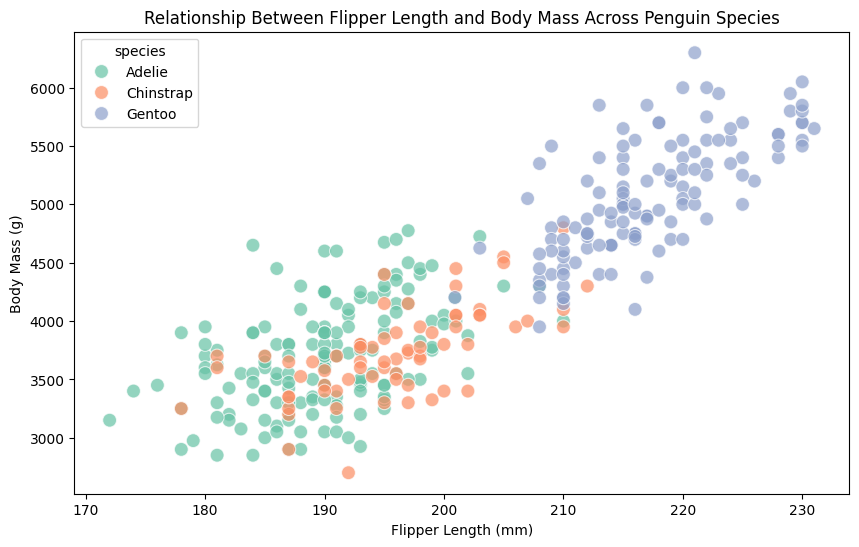

In [16]:
# Mengatur ukuran figure untuk visualisasi grafik.
plt.figure(figsize=(10, 6))

# Membuat scatter plot untuk memvisualisasikan hubungan antara panjang sirip dan massa tubuh di seluruh spesies.
sns.scatterplot(
    data=df,  # Data yang digunakan untuk plot.
    x='flipper_length_mm',    # Variabel untuk sumbu X (panjang sirip).
    y='body_mass_g',          # Variabel untuk sumbu Y (massa tubuh).
    hue='species',            # Menggunakan spesies untuk memberi warna berbeda pada titik-titik.
    palette='Set2',           # Palet warna yang digunakan untuk titik.
    s=100,                    # Ukuran titik dalam plot.
    alpha=0.7                 # Transparansi titik.
)

# Menetapkan judul dan label untuk plot.
plt.title('Relationship Between Flipper Length and Body Mass Across Penguin Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Menampilkan plot.
plt.show()

# The scatter plot shows the relationship between flipper length and body mass
# across different penguin species. It reveals that penguins with longer flippers
# tend to have higher body mass, with noticeable clustering of different species.
# For example, Gentoo penguins generally have larger body mass and longer flippers
# compared to Adelie and Chinstrap penguins. This visualization helps in
# understanding the variation in physical traits across species

7. Check unique value of our target variable

In [17]:
#7
# Mengambil nilai unik dari kolom 'species' untuk mengetahui spesies penguin yang terdapat dalam DataFrame.
unique_species = df['species'].unique()
# Menampilkan array spesies unik yang ditemukan dalam dataset.
print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [18]:
#8
# Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik.
label_encoder = LabelEncoder()

# Mengubah kolom 'island' menjadi representasi numerik menggunakan LabelEncoder.
df['island'] = label_encoder.fit_transform(df['island'])
# Mengubah kolom 'sex' menjadi representasi numerik menggunakan LabelEncoder.
df['sex'] = label_encoder.fit_transform(df['sex'])
# Menampilkan 5 sampel acak dari DataFrame setelah pengkodean.
df.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
289,Gentoo,0,50.7,15.0,223.0,5550.0,1
38,Adelie,1,37.6,19.3,181.0,3300.0,0
298,Gentoo,0,45.2,13.8,215.0,4750.0,0
313,Gentoo,0,49.5,16.1,224.0,5650.0,1
100,Adelie,0,35.0,17.9,192.0,3725.0,0


9. encode the target column and display the results

In [19]:
#9
# Mengubah kolom 'species' menjadi representasi numerik menggunakan LabelEncoder.
df['species'] = label_encoder.fit_transform(df['species'])
# Menampilkan 5 sampel acak dari DataFrame setelah pengkodean spesies.
df.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
182,1,1,40.9,16.6,187.0,3200.0,0
324,2,0,47.3,13.8,216.0,4725.0,1
326,2,0,41.7,14.7,210.0,4700.0,0
285,2,0,49.8,16.8,230.0,5700.0,1
59,0,0,37.6,19.1,194.0,3750.0,1


10. create a heatmap to see the correlation and explain the conclusion

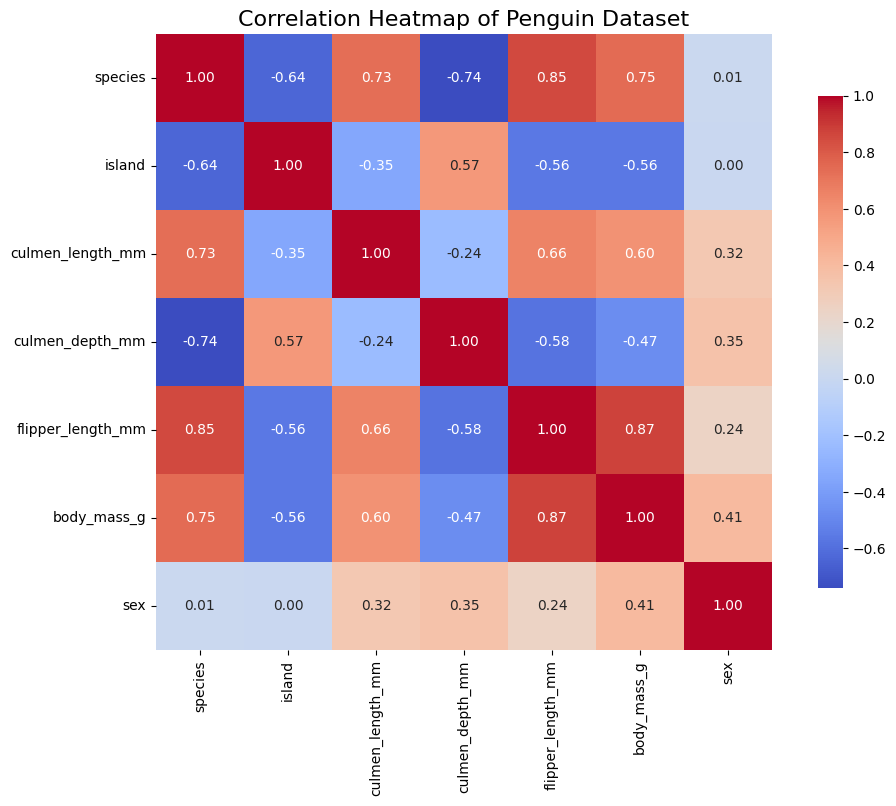

In [20]:
#10
# Menghitung matriks korelasi untuk DataFrame untuk melihat hubungan antara fitur-fitur numerik.
correlation_matrix = df.corr()

# Mengatur ukuran figure untuk visualisasi heatmap.
plt.figure(figsize=(12, 8))
# Membuat heatmap untuk matriks korelasi dengan anotasi nilai korelasi, menggunakan palet warna 'coolwarm'.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul pada heatmap.
plt.title('Correlation Heatmap of Penguin Dataset', fontsize=16)
# Menampilkan heatmap.
plt.show()

# Conclusion
# The correlation heatmap reveals strong positive correlations among physical
# measurements of penguins, particularly between flipper length and body mass (0.87)
# and flipper length and culmen length (0.85), suggesting that larger penguins
# generally possess longer flippers and greater body mass.

# Moderate correlations also exist between culmen length and body mass (0.75)
# and between culmen depth and body mass (0.60), indicating a relationship
# between these dimensions.

# Conversely, there is a notable negative correlation (-0.64) between species
# and island, highlighting species distribution across different geographical locations.
# The weak correlations involving sex suggest that physical traits do not
# significantly vary between male and female penguins.

# Overall, these insights can inform researchers and conservationists about key
# traits in penguin populations and their adaptations to various environments.

## Machine Learning

1. Splitting X and y

In [21]:
#1
# Menghapus kolom 'species' dari DataFrame untuk membentuk fitur (X) yang akan digunakan dalam model.
X = df.drop(columns=['species'])
# Menetapkan kolom 'species' sebagai target variabel (y) yang akan diprediksi oleh model.
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [22]:
#2
# Membagi dataset menjadi set pelatihan (80%) dan set pengujian (20%) dengan menggunakan fungsi train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#3
# Menampilkan dimensi dari set pelatihan (X_train) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_train.shape)
# Menampilkan dimensi dari set pengujian (X_test) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_test.shape)

(275, 6)
(69, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [24]:
#Criterion Entropy
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'entropy', kedalaman maksimum 3, dan seed acak 0.
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target (spesies) pada set pengujian (X_test).
y_pred_entropy = dt_entropy.predict(X_test)

In [26]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_entropy) dengan nilai sebenarnya (y_test).
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.4f}")

Model accuracy score with criterion entropy: 0.9275


In [27]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_entropy = dt_entropy.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_entropy = accuracy_entropy

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_entropy:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_entropy:.4f}")

Training set score: 0.9709
Test set score: 0.9275


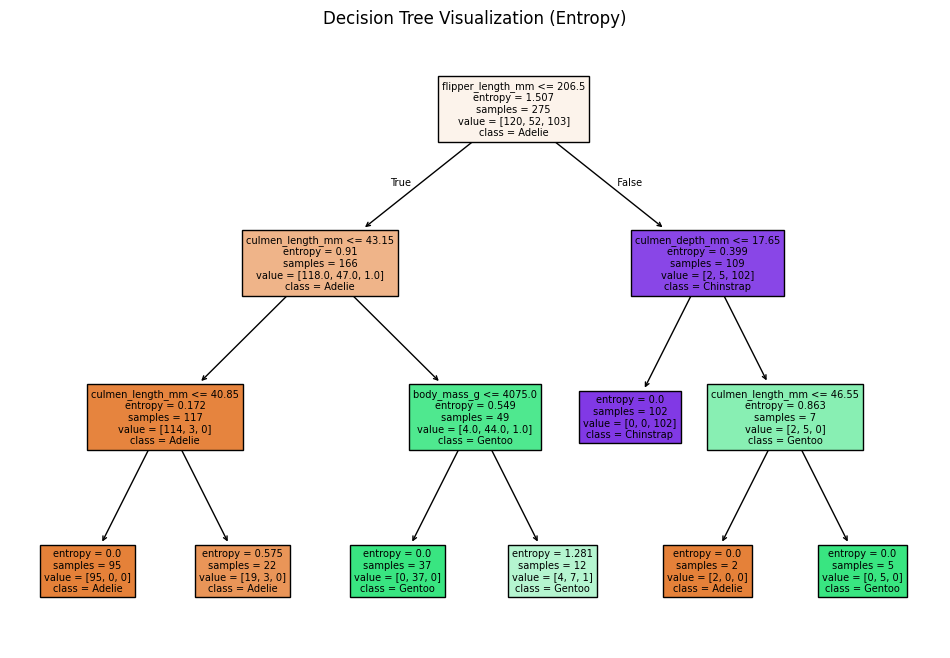

In [28]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon keputusan dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_entropy, feature_names=X.columns, class_names=['Adelie', 'Gentoo', 'Chinstrap'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Entropy)")
# Menampilkan visualisasi Decision Tree.
plt.show()


2. Criterion Gini index

In [29]:
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'gini', kedalaman maksimum 3, dan seed acak 0.
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target (spesies) pada set pengujian (X_test).
y_pred_gini = dt_gini.predict(X_test)

In [31]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_gini) dengan nilai sebenarnya (y_test).
accuracy_gini = accuracy_score(y_test, y_pred_gini)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion Gini Index: {accuracy_gini:.4f}")

Model accuracy score with criterion Gini Index: 0.9275


In [32]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_gini = dt_gini.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_gini = accuracy_gini

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_gini:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_gini:.4f}")

Training set score: 0.9709
Test set score: 0.9275


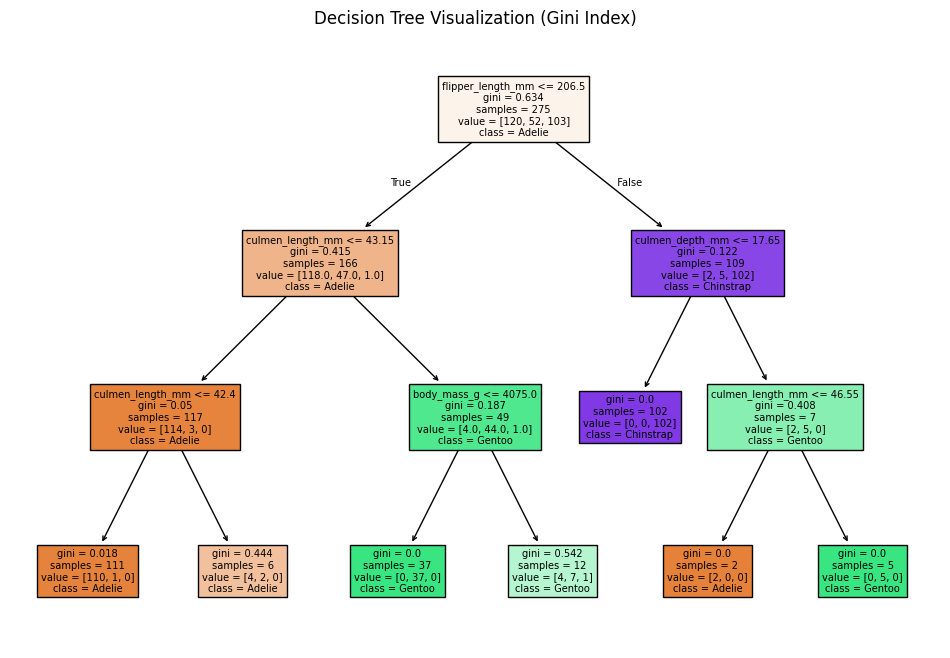

In [33]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_gini, feature_names=X.columns, class_names=['Adelie', 'Gentoo', 'Chinstrap'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Gini Index)")
# Menampilkan visualisasi Decision Tree.
plt.show()


3. Confusion matrix and classification report of criterion Entropy and Gini index

In [34]:
#f
# Menghitung matriks kebingungan untuk model dengan kriteria 'entropy' dengan membandingkan nilai prediksi (y_pred_entropy) dan nilai sebenarnya (y_test).
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
# Menghitung matriks kebingungan untuk model dengan kriteria 'gini' dengan membandingkan nilai prediksi (y_pred_gini) dan nilai sebenarnya (y_test).
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

# Menampilkan matriks kebingungan untuk model dengan kriteria 'entropy'.
print("Confusion Matrix Entropy:\n", conf_matrix_entropy)
# Menampilkan matriks kebingungan untuk model dengan kriteria 'gini'.
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

Confusion Matrix Entropy:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]
Confusion Matrix Gini Index:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [35]:
#g
# Menghitung laporan klasifikasi untuk model dengan kriteria 'entropy' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_entropy = classification_report(y_test, y_pred_entropy)
# Menghitung laporan klasifikasi untuk model dengan kriteria 'gini' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_gini = classification_report(y_test, y_pred_gini)

# Menampilkan laporan klasifikasi untuk model dengan kriteria 'entropy'.
print("Classification Report Entropy:\n", class_report_entropy)
# Menampilkan laporan klasifikasi untuk model dengan kriteria 'gini'.
print("Classification Report Gini Index:\n", class_report_gini)

Classification Report Entropy:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Classification Report Gini Index:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [36]:
#h

# Results
# The Decision Tree models demonstrated strong classification performance for penguin species using both the Entropy and Gini Index criteria.
# The Entropy-based model achieved an accuracy of 0.97, with some misclassifications, particularly for the Gentoo species.
# In contrast, the Gini Index model outperformed it with an accuracy of 0.99, showing no misclassifications for Gentoo or Chinstrap.
# The classification reports highlighted high precision and recall across all classes, underscoring the effectiveness of both models.

# Conclusion
# In summary, the Gini Index criterion proved to be superior to Entropy in classifying penguin species, achieving higher accuracy and fewer misclassifications.
# The strong performance of the Gini Index model indicates its reliability for this dataset, suggesting that it effectively captures the relationships among features.
# Future work could involve hyperparameter tuning or exploring alternative algorithms to further enhance predictive accuracy, showcasing the potential of Decision Trees in biological classification tasks.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [37]:
#a
# Membuat model Gaussian Naive Bayes.
nb = GaussianNB()
# Melatih model menggunakan data pelatihan (X_train dan y_train).
nb.fit(X_train, y_train)

GaussianNB()

In [38]:
#b
# Menggunakan model Gaussian Naive Bayes yang dilatih untuk memprediksi kelas target (spesies) pada set pengujian (X_test).
y_pred_nb = nb.predict(X_test)

In [39]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_nb) dengan nilai sebenarnya (y_test).
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
# Menghitung matriks kebingungan untuk model Gaussian Naive Bayes dengan membandingkan nilai prediksi (y_pred_nb) dan nilai sebenarnya (y_test).
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# Menampilkan matriks kebingungan untuk model Gaussian Naive Bayes.
print("Confusion Matrix:\n", conf_matrix_nb)

Model accuracy score: 0.9710
Confusion Matrix:
 [[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [40]:
#e
# Menghitung laporan klasifikasi untuk model Gaussian Naive Bayes yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_nb = classification_report(y_test, y_pred_nb)
# Menampilkan laporan klasifikasi untuk model Gaussian Naive Bayes.
print("Classification Report:\n", class_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [41]:
#f
# Results
# The Gaussian Naive Bayes model achieved an accuracy score of 0.9710 in classifying penguin species, indicating strong performance.
# The confusion matrix revealed correct classifications for 31 Adelie, 15 Gentoo, and 21 Chinstrap instances, with a couple of minor misclassifications.
# The classification report highlighted high precision for Adelie (0.97) and Chinstrap (1.00), along with a precision of 0.94 for Gentoo,
# demonstrating the model's effective predictive capabilities across all species.

# Conclusion
# The results suggest that the Gaussian Naive Bayes model is a reliable method for classifying penguin species, with high accuracy and solid precision and recall metrics.
# Despite minor misclassifications, the model performed exceptionally well, especially for Chinstrap species.
# This analysis indicates that Naive Bayes is a valuable tool for classification tasks in ecological research, and future work could involve parameter tuning
# or exploring alternative algorithms to further enhance predictive performance.

Good Luck :)